In [91]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#downloading dataset
fashion_mnist = keras.datasets.fashion_mnist 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [92]:
clothes_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [49]:
#getting to know the data
train_images.shape #the dimensions of the training images

(60000, 28, 28)

In [53]:
len(train_labels) #length of training labels

60000

In [54]:
train_labels #what the labels are

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [55]:
test_images.shape #the dimensions of the test images

(10000, 28, 28)

In [56]:
len(test_labels) #length of the testing labels

10000

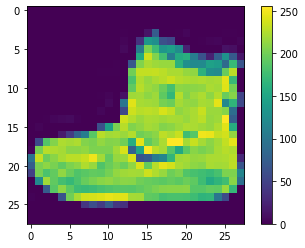

In [57]:
plt.figure()
plt.imshow(train_images[0]) #selecting the first image
plt.colorbar() #creates colorbar of where different pixels are - creating an outline of the clothing item
plt.grid(False)
plt.show() #visualises results
#pixels fall into the 0-250 range

In [58]:
#scaling all images by 0:1 by dividing then by 255. need to do this before creating a neural network
train_images = train_images / 255.0

test_images = test_images / 255.0

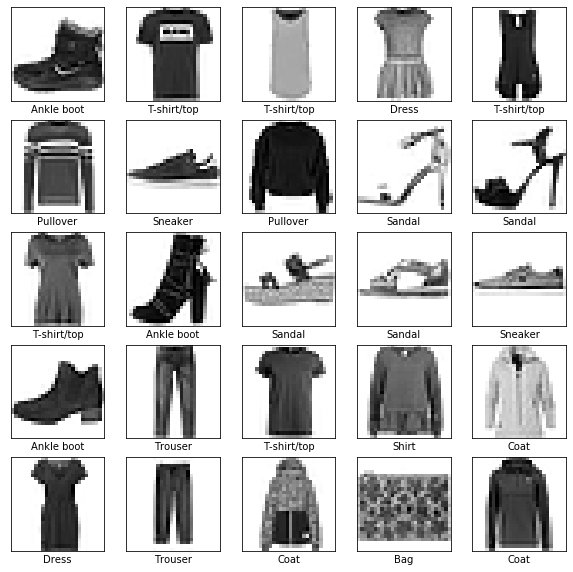

In [93]:
plt.figure(figsize=(10,10)) #scaling plot
for i in range(25): #algorithm repeated 25 times to display 25 images
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(clothes_names[train_labels[i]]) #printing the names of the clothes with the images
plt.show()

In [60]:
#keras model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #changes the format of the images from a 2-dimensional array to a 1-dimensional array
    keras.layers.Dense(128, activation='relu'), #dense layer made up of 128 nodes
    keras.layers.Dense(10, activation='softmax') #softmax layer made up of 10 nodes. Guesses which item of clothing the image could be by returning probability scores that add up to 1
])

In [61]:
#compiling model
model.compile(optimizer='adam', #how the model learns from the loss function
              loss='sparse_categorical_crossentropy', #measures accuracy
              metrics=['accuracy']) #used to watch the training and testing

In [62]:
#the beginning of training - using model.fit method
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.4995 - accuracy: 0.8252
Epoch 2/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3771 - accuracy: 0.8650
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3411 - accuracy: 0.8758
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3168 - accuracy: 0.8834
Epoch 5/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2977 - accuracy: 0.8905
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2814 - accuracy: 0.8953
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2686 - accuracy: 0.9001
Epoch 8/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2598 - accuracy: 0.9046
Epoch 9/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2490 - accuracy: 0.9082
Epoch 10/10
6

In [63]:
#comparing how well the model is performing using the test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.3297 - accuracy: 0.8786

Test accuracy: 0.8786


In [64]:
#model can now be used to make predictions
predictions = model.predict(test_images)

In [65]:
predictions[0] #predicting the first image
#Shows which items the model thinks the image is of.

array([3.0520772e-05, 1.8013490e-07, 2.1616177e-08, 2.7303554e-10,
       9.4471609e-08, 4.3295901e-03, 1.6251810e-05, 5.1653865e-03,
       2.5936989e-08, 9.9045789e-01], dtype=float32)

In [67]:
np.argmax(predictions[0]) #returns the label that the model thinks the image most likely of

9

In [68]:
test_labels[0] #seeing if this is correct

9

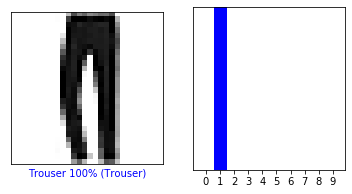

In [79]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array) #uses the prediction with the highest probability
  if predicted_label == true_label:
    color = 'blue' #correct predictions are in blue
  else:
    color = 'red' #incorrect predictions are in red

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777") #uses a bar chart to map predictions
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red') #incorrect predictions are in red
  thisplot[true_label].set_color('blue') #correct predictions are in blue
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

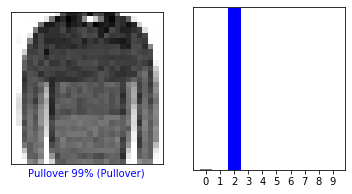

In [78]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

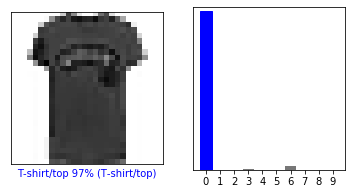

In [80]:
i = 19
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

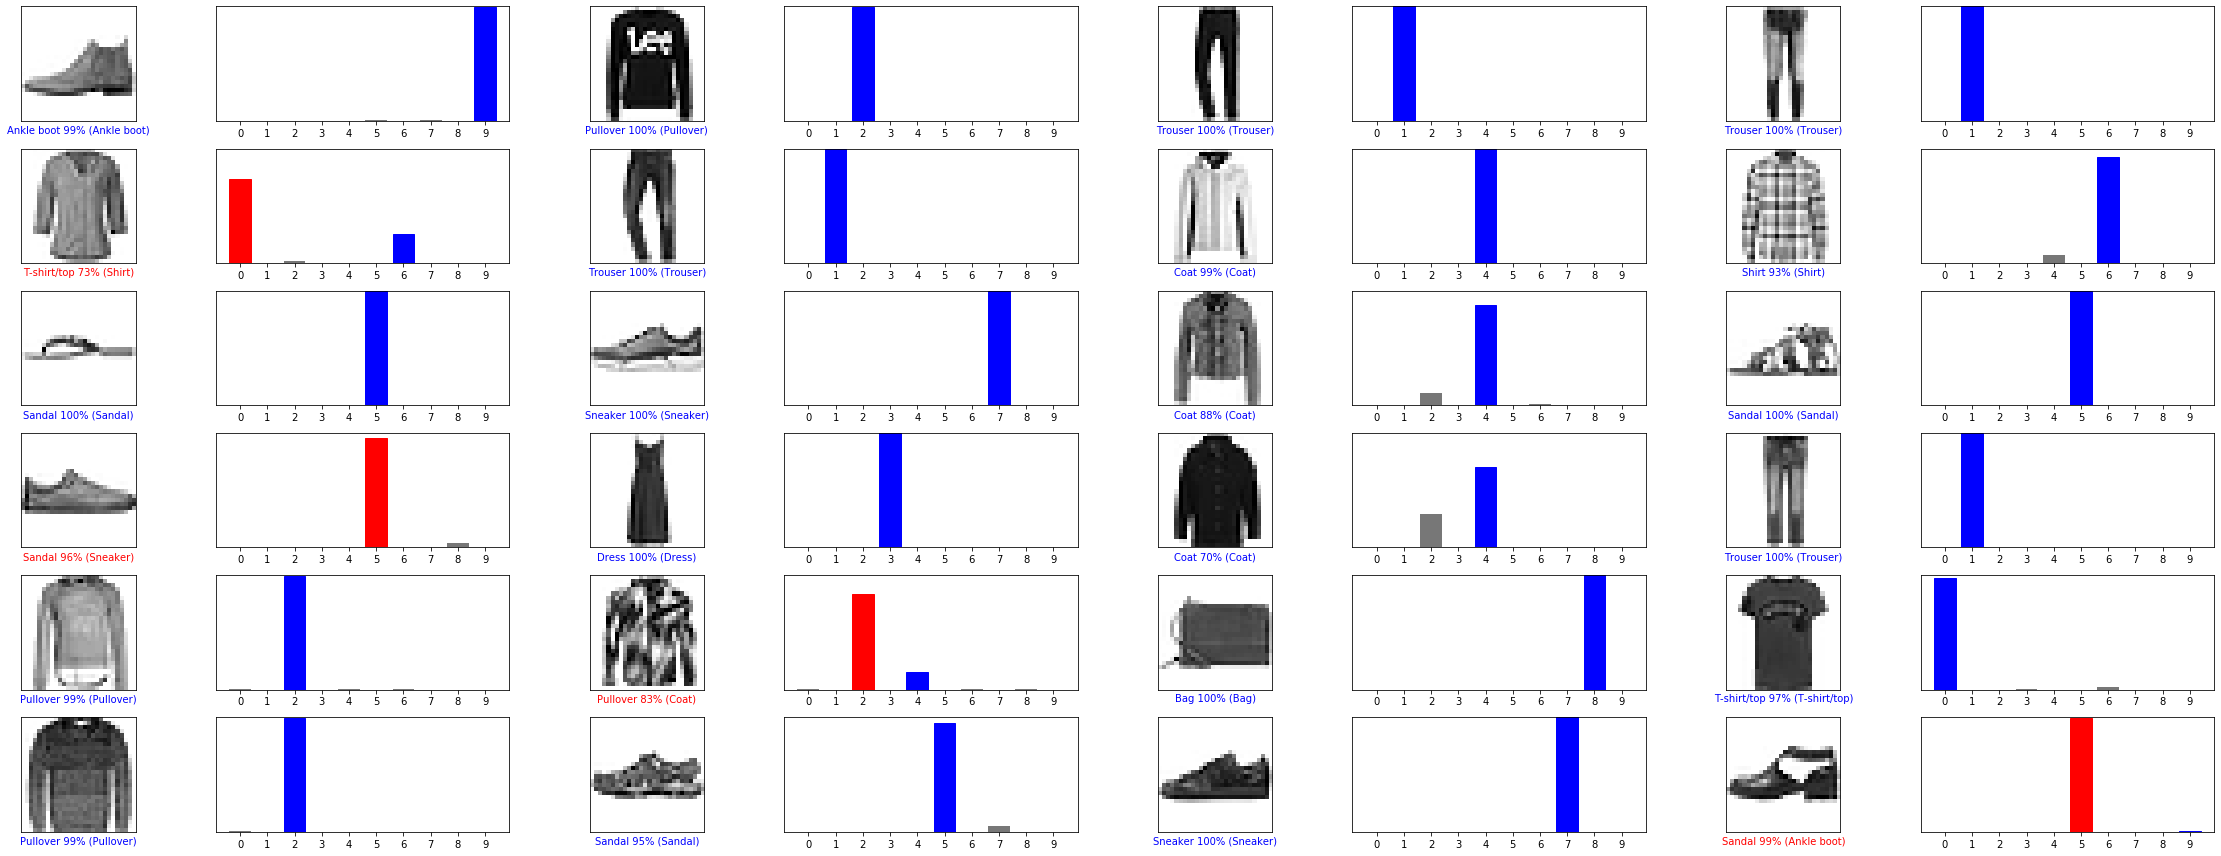

In [77]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols #layout
plt.figure(figsize=(4*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

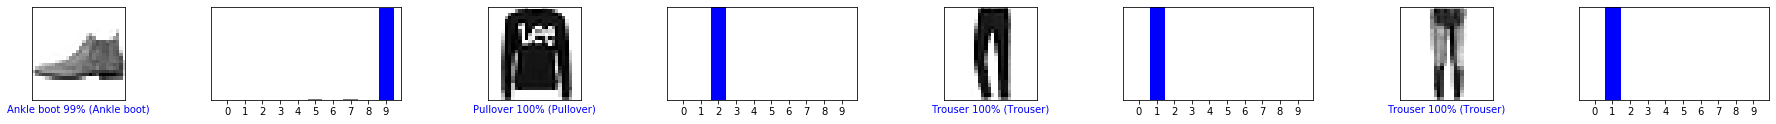

In [85]:
num_images = 2*2
plt.figure(figsize=(4*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)

In [86]:
#using model to predict a single image
img = test_images[1] #using the second test image

print(img.shape) #printing image 2's dimensions

(28, 28)


In [87]:
img = (np.expand_dims(img,0)) #adding image to a batch. It is the only image in this batch

print(img.shape) #it's dimensions alone in the batch

(1, 28, 28)


In [88]:
predictions_single = model.predict(img) #predictions that model can make from the image

print(predictions_single)

[[2.5850727e-04 7.8944928e-14 9.9773371e-01 3.8957145e-12 1.9578477e-03
  1.4389513e-09 4.9904786e-05 9.0969783e-18 4.0180481e-10 1.3091618e-15]]


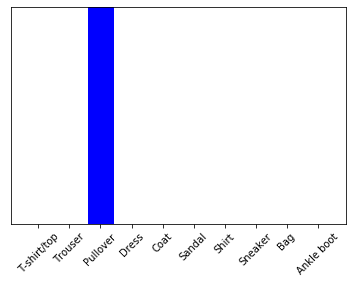

In [89]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45) #creating a bar chart of findings

In [90]:
np.argmax(predictions_single[0]) #most likely - prediction

2